In [1]:
#!pip install -U pgmpy==0.1.11
#!pip install -U bnlearn
#!pip install openml

     |████████████████████████████████| 317kB 6.3MB/s 
     |████████████████████████████████| 337kB 6.7MB/s 
     |████████████████████████████████| 11.6MB 9.4MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=89f5428d4f7ef6e9d185073b5aa0f0a71ccc5dc1029ae968ea1cbe46e131de9b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 112kB 5.1MB/s 
  Created wheel for openml: filename=openml-0.11.0-cp36-none-any.whl size=127467 sha256=1fcdeb19c14eddabb60c7ffcc5bf2f51468fb1b7dbbe442a2e46ce6b7246890d
  Stored in directory: /root/.cache/pip/wheels/fb/29/f1/58115101bafad19069e838060ab6bdd8046abceba508500e03
  Created wheel for liac-arff: filename=liac_arff-2.5.0-cp36-none-any.whl size=11733 sha256=b6bfc64e25e652816f13b64a6b52c0a1d9331bf3caf4d7dbd8001998e6020580
  Stored in directory: /root/.cache/pip/wheels/77/8d/b4/8bfce5beea9a3496cc15b24961876adb7b6e2912ff09164179
Successfully built openml liac-arff


In [1]:

import openml

In [2]:
import bnlearn
import pandas as pd
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

# Bankote dataset id = 1462

dataset = openml.datasets.get_dataset(1462)

# Print a summary

print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'banknote-authentication', the target feature is 'Class'
URL: https://www.openml.org/data/v1/download/1586223/banknote-authentication.arff
Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)  
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - 2012  
Please cite: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html) 

Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 


In [4]:
# Conversion of OpenMl datasets to pandas dataframe

X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)
#print(X.head())
#print(X.info())
#print(type(X))

combined_data = pd.concat([X, y], axis=1)

# Rounding off the data and converting it to Integer

combined_data_descrete = round(combined_data).astype(int) 


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


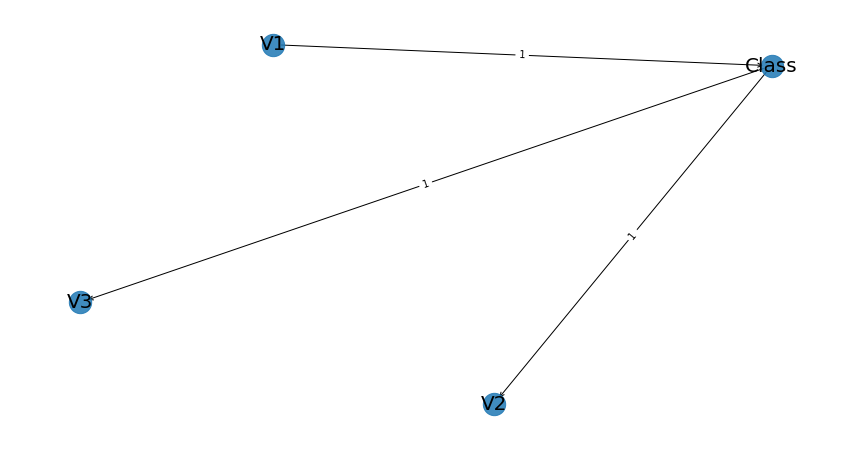

      V1  V2  V3  V4  Class
0      4   9  -3   0      1
1      5   8  -2  -1      1
2      4  -3   2   0      1
3      3  10  -4  -4      1
4      0  -4   5  -1      1
...   ..  ..  ..  ..    ...
1367   0   1  -1  -1      2
1368  -1  -5   6   0      2
1369  -4 -13  18  -3      2
1370  -4  -8  12  -1      2
1371  -3  -1   3   1      2

[1372 rows x 5 columns]


In [5]:
# Bayesian network

# Loading the Banknote dataset containing mixed variables
df_raw = combined_data_descrete


# Structure learning

DAG = bnlearn.structure_learning.fit(df_raw, methodtype='hc',scoretype='bic')
# Plot
G = bnlearn.plot(DAG)
print(df_raw)

In [6]:
# Parameter learning
model = bnlearn.parameter_learning.fit(DAG, combined_data_descrete )
bnlearn.print_CPD(model)

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of V1:
+--------+-----------+
| V1(-7) | 0.0318999 |
+--------+-----------+
| V1(-6) | 0.0340079 |
+--------+-----------+
| V1(-5) | 0.0394885 |
+--------+-----------+
| V1(-4) | 0.059303  |
+--------+-----------+
| V1(-3) | 0.0673131 |
+--------+-----------+
| V1(-2) | 0.102726  |
+--------+-----------+
| V1(-1) | 0.0879708 |
+--------+-----------+
| V1(0)  | 0.091765  |
+--------+-----------+
| V1(1)  | 0.0968241 |
+--------+-----------+
| V1(2)  | 0.0841765 |
+--------+-----------+
| V1(3)  | 0.0841765 |
+--------+-----------+
| V1(4)  | 0.0980888 |
+--------+-----------+
| V1(5)  | 0.0580382 |
+--------+-----------+
| V1(6)  | 0.0352726 |
+--------+-----------+
| V1(7)  | 0.0289488 |
+--------+-----------+
CPD of Class:
+----------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+----

In [7]:
# Print CPDs
bnlearn.print_CPD(model)
# Make inference
q = bnlearn.inference.fit(model, variables=['Class'], evidence={'V1': 10, 'V2': 2})

print(q.values)
print(q.variables)
print(q._str())

/usr/local/lib/python3.6/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:439: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Eliminating: V3: 100%|██████████| 1/1 [00:00<00:00, 137.39it/s]

CPD of V1:
+--------+-----------+
| V1(-7) | 0.0318999 |
+--------+-----------+
| V1(-6) | 0.0340079 |
+--------+-----------+
| V1(-5) | 0.0394885 |
+--------+-----------+
| V1(-4) | 0.059303  |
+--------+-----------+
| V1(-3) | 0.0673131 |
+--------+-----------+
| V1(-2) | 0.102726  |
+--------+-----------+
| V1(-1) | 0.0879708 |
+--------+-----------+
| V1(0)  | 0.091765  |
+--------+-----------+
| V1(1)  | 0.0968241 |
+--------+-----------+
| V1(2)  | 0.0841765 |
+--------+-----------+
| V1(3)  | 0.0841765 |
+--------+-----------+
| V1(4)  | 0.0980888 |
+--------+-----------+
| V1(5)  | 0.0580382 |
+--------+-----------+
| V1(6)  | 0.0352726 |
+--------+-----------+
| V1(7)  | 0.0289488 |
+--------+-----------+
CPD of Class:
+----------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+--------------------+--------------------+--------------------+-------------

In [8]:
result = { "result" :q._str()}

with open("result.json","w") as outfile:
  json.dump(result,outfile)